# Plant Diseases Detection

## Importing Libraries

We start by importing the necessary libraries for data manipulation, visualization, image processing, and machine learning.

- `numpy`: Library for numerical operations
- `matplotlib.pyplot`: Library for plotting graphs and images
- `cv2`: OpenCV for image processing
- `tensorflow`: Machine learning library for building and training models
- `keras`: High-level neural networks API (part of TensorFlow)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 
import tensorflow as tf
from tensorflow import keras
# Use tf.compat.v1.ragged.RaggedTensorValue instead of tf.ragged.RaggedTensorValue
# and tf.compat.v1.executing_eagerly_outside_functions instead of tf.executing_eagerly_outside_functions

## Loading and Preprocessing Data

This block loads and preprocess the dataset using the `image_dataset_from_directory` function from TensorFlow/Keras.

### Parameters:
- `path`: The path to the directory containing the dataset.
- `image_size`: The dimensions to which all input images are resized.
- `batch_size`: The number of samples per batch during training.
- `seed`: The seed for the random number generator for reproducibility.
- `validation_split`: The proportion of the dataset used for validation.
- `subset`: Specifies to use both the training and validation subsets.


In [3]:
path = './dataset/color'
train_ds , test_ds = keras.utils.image_dataset_from_directory(
    path ,
    image_size=(224,224),
    batch_size=32 ,
    seed = 123 ,
    validation_split=.2,
    subset='both'
)

Found 54305 files belonging to 38 classes.
Using 43444 files for training.
Using 10861 files for validation.


## Extracting Class Names

After creating the `train_ds` dataset, we can extract the list of class names using the `class_names` attribute. This list represents the different classes present in the dataset.

In [4]:
classes = train_ds.class_names

## Visualizing Images

Now visualize some example images from the dataset. The image is loaded using OpenCV (`cv2.imread`), and then displayed using Matplotlib (`plt.imshow`).

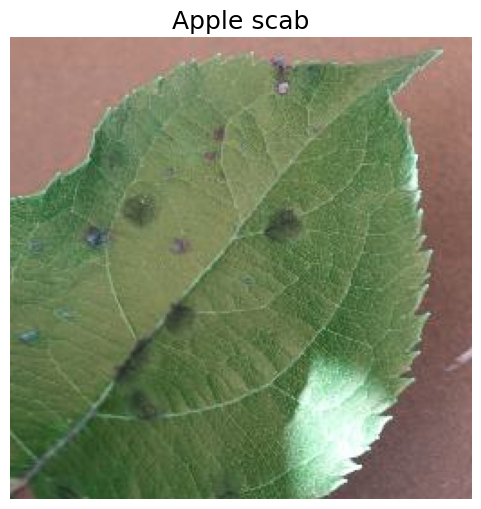

In [5]:
image = cv2.imread("./dataset/color/Apple___Apple_scab/01f3deaa-6143-4b6c-9c22-620a46d8be04___FREC_Scab 3112.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Apple scab',size =18 )
plt.axis('off')
plt.show()

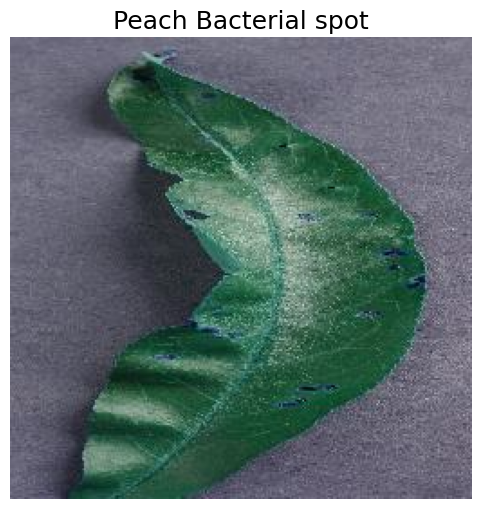

In [6]:
image = cv2.imread("./dataset/color/Peach___Bacterial_spot/00e6ad4a-5a62-48d7-ac68-9c0b8ec87f5f___Rut._Bact.S 1472.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Peach Bacterial spot',size =18 )
plt.axis('off')
plt.show()

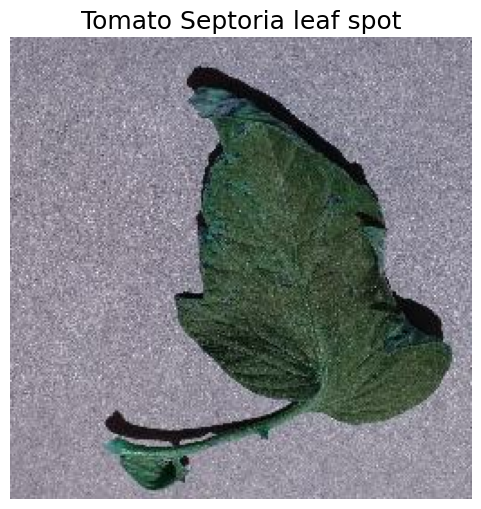

In [7]:
image = cv2.imread("./dataset/color/Tomato___Septoria_leaf_spot/015c2613-fb1c-4f31-88f1-c7e5be9ddc97___JR_Sept.L.S 8431.JPG")
plt.figure(figsize = (6,6))
plt.imshow(image)
plt.title('Tomato Septoria leaf spot',size =18 )
plt.axis('off')
plt.show()

## Build Neural Network CNN

Define the architecture of Convolutional Neural Network (CNN) using TensorFlow/Keras. The CNN is designed for image classification, and the following layers are incorporated:

In [8]:
# Use tf.compat.v1.get_default_graph() instead of tf.get_default_graph()
# Use tf.nn.max_pool2d instead of tf.nn.max_pool
model = keras.Sequential([
    keras.layers.Rescaling(scale = 1/255 , input_shape =(224,224,3) ) ,

    keras.layers.Conv2D(32 , (3,3) , activation = 'relu'),
    keras.layers.MaxPool2D((2,2))                     ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(64 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(128 , (3,3) , activation = 'relu') ,
    keras.layers.MaxPool2D((2,2)) ,

    # fully connected layers

    keras.layers.Flatten(),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(64,activation = 'relu'),
    keras.layers.Dense(38,activation ='sigmoid')

])

## Compiling the Model

After defining the architecture of the Convolutional Neural Network (CNN), the next step is to compile the model. This involves specifying the optimizer, loss function, and metrics for training.


In [9]:
model.compile(
    optimizer = 'adam' ,
    loss = 'sparse_categorical_crossentropy',
    metrics = 'accuracy'
)

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 111, 111, 32)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 111, 111, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 54, 54, 64)        0         
 g2D)                                                   

## Training the Model

Now that the model is compiled, it's time to train it on the training dataset. The `fit` method is used for this purpose.

In [11]:
history = model.fit(train_ds , epochs = 20)

Epoch 1/20


1358/1358 [==============================] - 3346s 2s/step - loss: 1.6811 - accuracy: 0.5283
Epoch 2/20
1358/1358 [==============================] - 1719s 1s/step - loss: 0.6538 - accuracy: 0.7970
Epoch 3/20
1358/1358 [==============================] - 44483s 33s/step - loss: 0.4345 - accuracy: 0.8594
Epoch 4/20
1358/1358 [==============================] - 20403s 15s/step - loss: 0.3142 - accuracy: 0.8965
Epoch 5/20
1358/1358 [==============================] - 64914s 48s/step - loss: 0.2528 - accuracy: 0.9173
Epoch 6/20
1358/1358 [==============================] - 121334s 89s/step - loss: 0.2133 - accuracy: 0.9292
Epoch 7/20
1358/1358 [==============================] - 1076s 792ms/step - loss: 0.1842 - accuracy: 0.9384
Epoch 8/20
1358/1358 [==============================] - 2759s 2s/step - loss: 0.1660 - accuracy: 0.9451
Epoch 9/20
1358/1358 [==============================] - 1086s 799ms/step - loss: 0.1506 - accuracy: 0.9498
Epoch 10/20
1358/1358 [========================

## Visualizing Training Accuracy and Loss

In the previous code cell, we trained our plant disease detection model for 20 epochs.
Now, let's visualize how the model performed during training by plotting the training accuracy and loss over epochs.

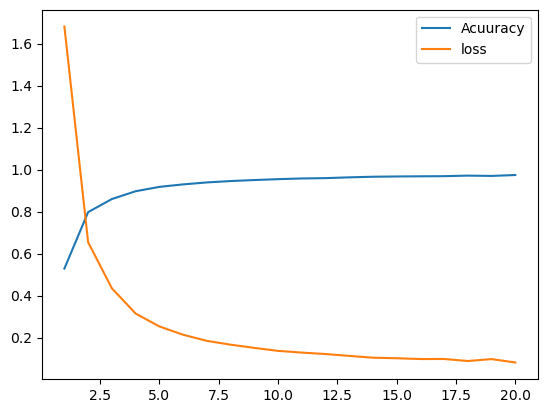

In [12]:
accuracy = history.history['accuracy']
loss = history.history['loss']
epochs = range(1,21)

plt.plot(epochs , accuracy , label = 'Acuuracy')
plt.plot(epochs , loss , label = 'loss')
plt.legend()
plt.show()

## Evaluating Model Performance on Test Dataset

 After training our plant disease detection model, it's important to assess its performance on an independent dataset.
 We use the `evaluate` method to quantify how well the model generalizes to new, unseen data.

`test_ds` is the test dataset containing images and corresponding labels that the model has not seen during training.
 The evaluation process computes metrics such as accuracy and loss on the test dataset.

In [13]:
model.evaluate(test_ds)

340/340 [==============================] - 69s 195ms/step - loss: 0.1838 - accuracy: 0.9468


[0.18379957973957062, 0.9467820525169373]

# Test Model Prediction
The `img_to_pred` function is designed to convert a given image tensor into a format suitable for model prediction.

### Parameters:
- image: The input image tensor, typically in the form of a NumPy array or a TensorFlow tensor.
          It represents an image that you want to obtain predictions for.

#### Steps in the Function:
 1. Convert the input image tensor to a NumPy array.
 2. Add an extra dimension to the array to create a batch. This is necessary as models usually expect
    input data in batches, even if the batch size is 1.

 The resulting tensor is now ready to be passed to the model for making predictions.

In [16]:
def img_to_pred(image):
  image = image.numpy()
  image = tf.expand_dims(image,0)
  return image

## Visualizing Model Predictions on Test Images

In this code snippet, we visualize the model predictions on a batch of test images from the `test_ds` dataset.
For each image in the batch, we display the actual class label, the predicted class label, and the image itself.

### Steps in the Code:
 1. Iterate through the first batch of test images and their corresponding labels using `test_ds.take(1)`.
 2. For each image in the batch:
    a. Plot the image using Matplotlib.
    b. Make a model prediction on the image using `model.predict(img_to_pred(images[i]))`.
    c. Display the actual and predicted class labels as titles.
 3. Repeat this process for a specified number of images (in this case, 9) in a 3x3 grid.

1/1 [==============================] - 0s 123ms/step


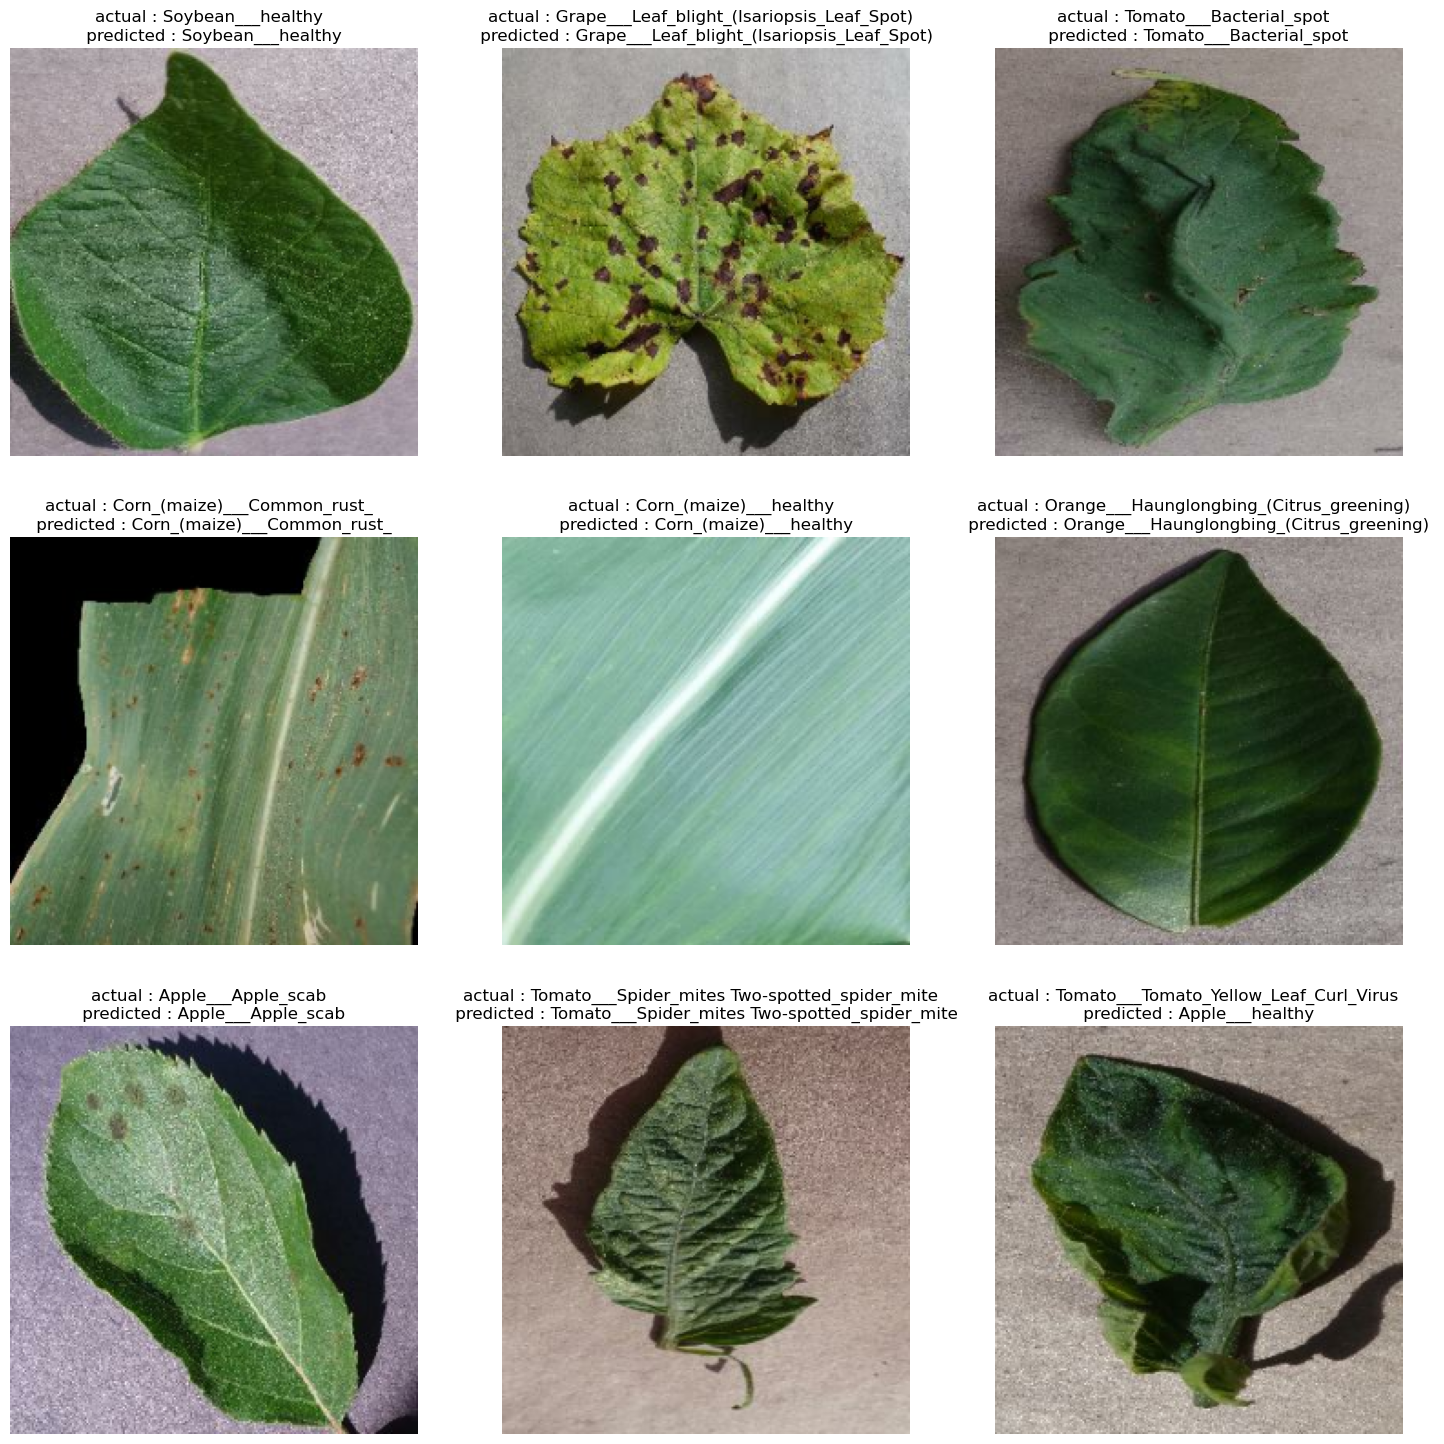

In [17]:
plt.figure(figsize=(18,18))
for images, labels in test_ds.take(1) : # take the first patch
  for i in range(1,10):
    plt.subplot(3,3,i)
    plt.imshow(images[i].numpy().astype('uint32'))
    plt.axis('off')
    actual = classes[labels[i]]
    predict =classes[np.argmax( model.predict(img_to_pred(images[i])))]
    plt.title(f"actual : {actual}  \n predicted : {predict} ")